<a href="https://colab.research.google.com/github/amandarenataa/DataMining_AmandaRenata/blob/main/W06%20-%200706022310010%20-%20Amanda%20Renata_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Amanda - 0706022310010 dan Sharon - 0706022310024

# DATA DESCRIPTION (Target: y)
Bank Marketing Dataset

Column | Description <br>
age | Age of the client<br>
job | Type of job<br>
marital | Marital status<br>
education | Education level<br>
default | Has credit in default?<br>
housing | Has housing loan?<br>
loan | Has personal loan?<br>
contact | Contact communication type<br>
month | Last contact month of year<br>
day | Last contact day of the week<br>
duration | Last contact duration (seconds)<br>
campaign | Number of contacts during this campaign<br>
pdays | Days since last contact from a previous campaign (999 = never
contacted)<br>
previous | Number of contacts before this campaign<br>
poutcome | Outcome of previous marketing campaign<br>
y | Target — Client subscribed to a term deposit? (yes/no)<br>



In [42]:
# import library
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn import tree

In [43]:
# load dataset
pd.set_option('display.max_columns', None) # Display all columns

url = "https://raw.githubusercontent.com/NathaliaMinoque/datasets/refs/heads/main/Bank%20(1).csv"
df = pd.read_csv(url, sep=';')
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no


In [44]:
# get info from dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4521 entries, 0 to 4520
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        4521 non-null   int64 
 1   job        4521 non-null   object
 2   marital    4521 non-null   object
 3   education  4521 non-null   object
 4   default    4521 non-null   object
 5   balance    4521 non-null   int64 
 6   housing    4521 non-null   object
 7   loan       4521 non-null   object
 8   contact    4521 non-null   object
 9   day        4521 non-null   int64 
 10  month      4521 non-null   object
 11  duration   4521 non-null   int64 
 12  campaign   4521 non-null   int64 
 13  pdays      4521 non-null   int64 
 14  previous   4521 non-null   int64 
 15  poutcome   4521 non-null   object
 16  y          4521 non-null   object
dtypes: int64(7), object(10)
memory usage: 600.6+ KB


In [45]:
# get statistical info from dataset
df.describe()

,age,balance,day,duration,campaign,pdays,previous
count,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000
mean,41.170095,1422.657819,15.915284,263.961292,2.793630,39.766645,0.542579
std,10.576211,3009.638142,8.247667,259.856633,3.109807,100.121124,1.693562
min,19.000000,-3313.000000,1.000000,4.000000,1.000000,-1.000000,0.000000
25%,33.000000,69.000000,9.000000,104.000000,1.000000,-1.000000,0.000000
50%,39.000000,444.000000,16.000000,185.000000,2.000000,-1.000000,0.000000
75%,49.000000,1480.000000,21.000000,329.000000,3.000000,-1.000000,0.000000
max,87.000000,71188.000000,31.000000,3025.000000,50.000000,871.000000,25.000000


# Preprocessing

In [46]:
# show unique values from dataset
unique_values = {col: df[col].unique() for col in df.columns}
display(unique_values)

{'age': array([30, 33, 35, 59, 36, 39, 41, 43, 20, 31, 40, 56, 37, 25, 38, 42, 44,
        26, 55, 67, 53, 68, 32, 49, 78, 23, 52, 34, 61, 45, 48, 57, 54, 63,
        51, 29, 50, 27, 60, 28, 21, 58, 22, 46, 24, 77, 75, 47, 70, 65, 64,
        62, 66, 19, 81, 83, 80, 71, 72, 69, 79, 73, 86, 74, 76, 87, 84]),
 'job': array(['unemployed', 'services', 'management', 'blue-collar',
        'self-employed', 'technician', 'entrepreneur', 'admin.', 'student',
        'housemaid', 'retired', 'unknown'], dtype=object),
 'marital': array(['married', 'single', 'divorced'], dtype=object),
 'education': array(['primary', 'secondary', 'tertiary', 'unknown'], dtype=object),
 'default': array(['no', 'yes'], dtype=object),
 'balance': array([ 1787,  4789,  1350, ...,  -333, -3313,  1137]),
 'housing': array(['no', 'yes'], dtype=object),
 'loan': array(['no', 'yes'], dtype=object),
 'contact': array(['cellular', 'unknown', 'telephone'], dtype=object),
 'day': array([19, 11, 16,  3,  5, 23, 14,  6, 17, 20,

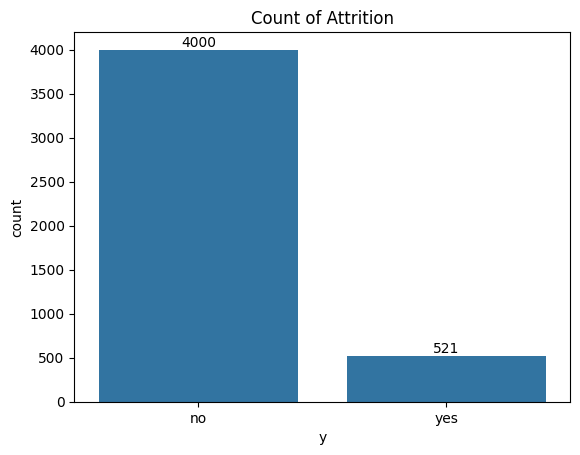

In [47]:
# show how many attrition
ax = sns.countplot(data=df, x='y')
plt.title('Count of Attrition')

# Add labels to the bars
for container in ax.containers:
    ax.bar_label(container)
plt.show()

The attrition data show a class imbalance between the two target categories:
- “No”: 4000 records
- “Yes”: 521 records

We can see that the dataset is very imbalance between the two classes.

# VISUALISASI

Bar Chart (Count Plot) untuk melihat distribusi target y. Ini akan memberitahu  apakah data seimbang atau tidak.

Grouped Bar Chart untuk job vs y untuk melihat pekerjaan mana yang paling potensial.

Box Plot untuk age vs y untuk memahami profil demografis klien yang sukses.

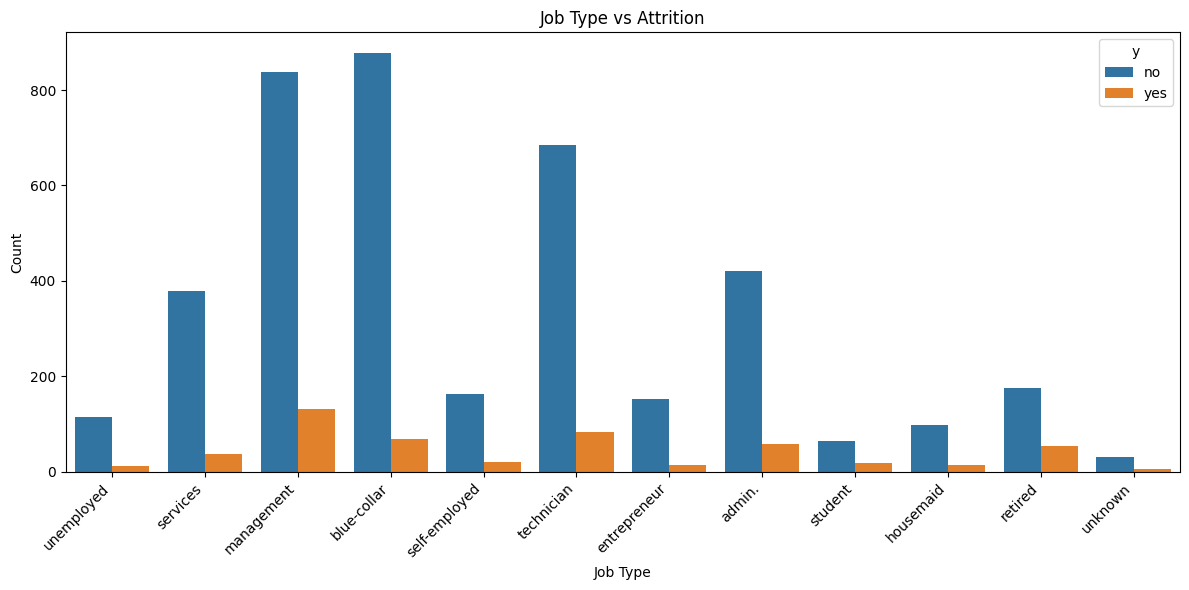

In [82]:
# Grouped Bar Chart for job vs y
plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='job', hue='y')
plt.title('Job Type vs Attrition')
plt.xlabel('Job Type')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

**Interpretation of the Grouped Bar Chart (Job vs. y):**

This chart shows us how many customers said 'yes' (they subscribed) *and* 'no' (they didn't subscribe) for each type of job. Here are some key things we can see:

*   **Most Subscribers:** Jobs like 'management', 'blue-collar', and 'technician.' have the largest number of customers who subscribed.
*   **Subscription Rate:** It's also good to look at the percentage of people who subscribed within each job type. Even if the total number of subscribers isn't the highest, some jobs like 'student' and 'retired' might have a higher chance of subscribing compared to the total number of people in those jobs.
*   **'unknown' job:** The 'unknown' job category has quite a few customers who didn't subscribe. We might want to look into why their job info is missing and how that affects their decision to subscribe.

This analysis helps us see which jobs are more likely to subscribe, so we can focus our marketing efforts on those groups.

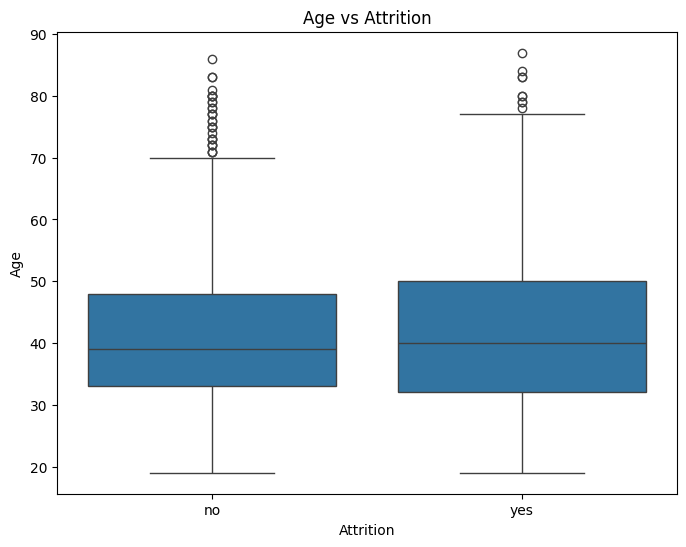

In [49]:
# Box Plot for age vs y
plt.figure(figsize=(8, 6))
sns.boxplot(data=df, x='y', y='age')
plt.title('Age vs Attrition')
plt.xlabel('Attrition')
plt.ylabel('Age')
plt.show()


**Interpretation of the BoxPlot (Age vs. y):**

* The median age for both groups ('yes' and 'no') seems quite similar, around the late 30s to early 40s. This suggests that the average age doesn't significantly differ between customers who subscribed and those who didn't.

* However, the box plot for customers who subscribed ('yes') appears to have a wider age range, especially towards older ages. There are quite a few outliers in the older age range in the 'yes' group.

* This could mean that even though the average age isn't very different, there's a larger proportion of older customers who tend to subscribe compared to the group that didn't subscribe.


Overall, while age isn't a very strong differentiator based on the median, the wider distribution of ages with older outliers in the 'yes' group suggests that older customers have a tendency to subscribe.

# Feature Encoding

In [50]:
# duplicate df
df_encoded = df.copy()

from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder

# 1. One-Hot Encoding
# Columns: Attrition, Gender, OverTime

one_hot_map = {
    'y': {'no': 0, 'yes': 1},
    'default': {'no': 0, 'yes': 1},
    'housing': {'no': 0, 'yes': 1},
    'loan': {'no': 0, 'yes': 1},
}

for col, mapping in one_hot_map.items():
    df_encoded[col] = df_encoded[col].map(mapping)

# 2. Nominal Encoding
# Suppose you already fitted the encoder:
nominal_cols = ['job', 'marital', 'education', 'contact', 'month', 'poutcome']
encoder = OrdinalEncoder()
df_encoded[nominal_cols] = encoder.fit_transform(df_encoded[nominal_cols])

# Build a mapping dictionary
encode_dict = {}

for col, cats in zip(nominal_cols, encoder.categories_):
    encode_dict[col] = {category: int(code) for code, category in enumerate(cats)}

# Show the full dictionary
import pprint
pprint.pprint(encode_dict)

df_encoded.sample(n = 5)

{'contact': {'cellular': 0, 'telephone': 1, 'unknown': 2},
 'education': {'primary': 0, 'secondary': 1, 'tertiary': 2, 'unknown': 3},
 'job': {'admin.': 0,
         'blue-collar': 1,
         'entrepreneur': 2,
         'housemaid': 3,
         'management': 4,
         'retired': 5,
         'self-employed': 6,
         'services': 7,
         'student': 8,
         'technician': 9,
         'unemployed': 10,
         'unknown': 11},
 'marital': {'divorced': 0, 'married': 1, 'single': 2},
 'month': {'apr': 0,
           'aug': 1,
           'dec': 2,
           'feb': 3,
           'jan': 4,
           'jul': 5,
           'jun': 6,
           'mar': 7,
           'may': 8,
           'nov': 9,
           'oct': 10,
           'sep': 11},
 'poutcome': {'failure': 0, 'other': 1, 'success': 2, 'unknown': 3}}


,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
4005,55,1.0,1.0,0.0,0,1086,1,0,0.0,6,8.0,146,1,272,2,0.0,0
77,40,9.0,2.0,1.0,0,591,0,1,0.0,14,1.0,87,6,-1,0,3.0,0
2211,55,4.0,0.0,2.0,0,1598,0,0,0.0,22,1.0,607,4,-1,0,3.0,0
4362,40,9.0,1.0,1.0,0,697,0,0,0.0,24,6.0,220,2,219,2,1.0,0
2385,47,7.0,1.0,1.0,0,3333,1,1,0.0,29,5.0,114,2,-1,0,3.0,0


In [51]:
# checking encode result
df.loc[101]

,101
age,38
job,management
marital,single
education,tertiary
default,no
balance,493
housing,yes
loan,no
contact,cellular
day,11


## Separate features and target

### Subtask:
Define the features (X) and the target variable (y).


**Reasoning**:
Define the features (X) by dropping the target variable 'Attrition' from the DataFrame and define the target variable (y) as the 'Attrition' column.



In [52]:
X = df_encoded.drop('y', axis=1)
y = df_encoded['y']

In [53]:
X.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
0,30,10.0,1.0,0.0,0,1787,0,0,0.0,19,10.0,79,1,-1,0,3.0
1,33,7.0,1.0,1.0,0,4789,1,1,0.0,11,8.0,220,1,339,4,0.0
2,35,4.0,2.0,2.0,0,1350,1,0,0.0,16,0.0,185,1,330,1,0.0
3,30,4.0,1.0,2.0,0,1476,1,1,2.0,3,6.0,199,4,-1,0,3.0
4,59,1.0,1.0,1.0,0,0,1,0,2.0,5,8.0,226,1,-1,0,3.0


In [54]:
y.head()

,y
0,0
1,0
2,0
3,0
4,0


## Split data

### Subtask:
Split the encoded data into training and testing sets.


**Reasoning**:
Split the encoded feature DataFrame X and the target Series y into training and testing sets.



In [55]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [56]:
# check the shape of X_train and X_test

X_train.shape, X_test.shape

((3164, 16), (1357, 16))

In [57]:
X_train.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
565,40,9.0,1.0,1.0,0,56,1,1,0.0,29,4.0,194,1,247,1,0.0
3480,47,7.0,1.0,1.0,0,440,1,0,2.0,12,6.0,91,1,-1,0,3.0
2125,52,9.0,1.0,1.0,0,3554,0,1,0.0,8,5.0,89,1,-1,0,3.0
3452,31,0.0,1.0,1.0,0,0,1,0,0.0,29,5.0,82,5,-1,0,3.0
1667,33,1.0,1.0,1.0,0,-346,1,1,2.0,23,8.0,29,3,-1,0,3.0


In [58]:
X_test.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
4274,35,1.0,1.0,0.0,0,378,1,0,2.0,16,8.0,427,3,-1,0,3.0
72,31,4.0,2.0,2.0,0,6248,1,0,2.0,9,8.0,154,2,-1,0,3.0
1065,30,10.0,1.0,2.0,0,0,1,0,0.0,18,9.0,756,1,-1,0,3.0
3185,42,0.0,1.0,1.0,0,529,1,1,0.0,19,9.0,193,3,-1,0,3.0
130,41,1.0,1.0,0.0,0,168,1,0,0.0,18,9.0,187,3,-1,0,3.0


# Decision Tree Classifier

In [59]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import f1_score, precision_score, recall_score, classification_report

tree = DecisionTreeClassifier(random_state=0)
tree.fit(X_train, y_train)

y_pred_train = tree.predict(X_train)
y_pred_test = tree.predict(X_test)

print("\n=== Classification Report (Training Set) ===")
print(classification_report(y_train, y_pred_train))

print("\n=== Classification Report (Test Set) ===")
print(classification_report(y_test, y_pred_test))


=== Classification Report (Training Set) ===
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2810
           1       1.00      1.00      1.00       354

    accuracy                           1.00      3164
   macro avg       1.00      1.00      1.00      3164
weighted avg       1.00      1.00      1.00      3164


=== Classification Report (Test Set) ===
              precision    recall  f1-score   support

           0       0.92      0.92      0.92      1190
           1       0.44      0.45      0.45       167

    accuracy                           0.86      1357
   macro avg       0.68      0.69      0.68      1357
weighted avg       0.86      0.86      0.86      1357



*   The F1 Score also significantly different so we need to handle this imbalance dataset. <br>
*   The accuracy of training set is 100% and testing set is 86%, which is good but the f1-scores in testing set are not balanced. This indicates overfitting, therefore we need to apply pre-prunning to the tree. We will tune the parameter by add a max_depth (limiting the depth/ branching of tree) and etc. <br>

# Oversampling using SMOTENC

In [60]:
# using SMOTE-NC for dataset containing numerical and categorical features.

from imblearn.over_sampling import SMOTENC

# we should define the categorical features first to make oversampling more accurate
categorical_features = [
    'job',
    'marital',
    'education',
    'default',
    'housing',
    'loan',
    'contact',
    'month',
    'poutcome'
]

smotenc = SMOTENC(categorical_features=categorical_features, random_state=42)
X, y = smotenc.fit_resample(X, y)

# dont forget to always do partitioning AFTER undersampling/oversampling
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

# check the shape of X_train and X_test
X_train.shape, X_test.shape

((5600, 16), (2400, 16))

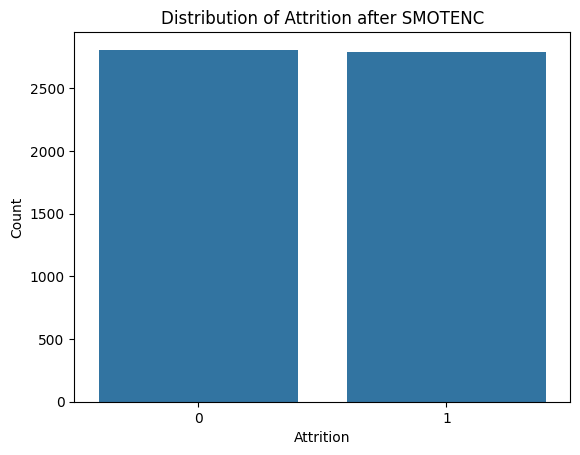

In [61]:
# just to visualize the distribution of target class after SMOTENC

sns.countplot(x=y_train)
plt.title('Distribution of Attrition after SMOTENC')
plt.xlabel('Attrition')
plt.ylabel('Count')
plt.show()

In [62]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4521 entries, 0 to 4520
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        4521 non-null   int64 
 1   job        4521 non-null   object
 2   marital    4521 non-null   object
 3   education  4521 non-null   object
 4   default    4521 non-null   object
 5   balance    4521 non-null   int64 
 6   housing    4521 non-null   object
 7   loan       4521 non-null   object
 8   contact    4521 non-null   object
 9   day        4521 non-null   int64 
 10  month      4521 non-null   object
 11  duration   4521 non-null   int64 
 12  campaign   4521 non-null   int64 
 13  pdays      4521 non-null   int64 
 14  previous   4521 non-null   int64 
 15  poutcome   4521 non-null   object
 16  y          4521 non-null   object
dtypes: int64(7), object(10)
memory usage: 600.6+ KB


In [63]:
# BUILD CLASSIFICATION MODEL
tree = DecisionTreeClassifier()
tree.fit(X_train, y_train)

y_pred_train = tree.predict(X_train)
y_pred_test = tree.predict(X_test)

print("\n=== Classification Report (Training Set) ===")
print(classification_report(y_train, y_pred_train))

print("\n=== Classification Report (Test Set) ===")
print(classification_report(y_test, y_pred_test))


=== Classification Report (Training Set) ===
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2808
           1       1.00      1.00      1.00      2792

    accuracy                           1.00      5600
   macro avg       1.00      1.00      1.00      5600
weighted avg       1.00      1.00      1.00      5600


=== Classification Report (Test Set) ===
              precision    recall  f1-score   support

           0       0.88      0.85      0.86      1192
           1       0.86      0.88      0.87      1208

    accuracy                           0.87      2400
   macro avg       0.87      0.87      0.87      2400
weighted avg       0.87      0.87      0.87      2400



After applying SMOTENC to balance the dataset, the model's performance has improved (Accuracy: 0.87). The model now performs much more balanced across both classes:

* Class 0 (No Attrition): precision = 0.89, recall = 0.85
* Class 1 (Attrition): precision = 0.86, recall = 0.89

# KFold Cross Validation

In [64]:
# Lets split the data into 5 folds.
# We will use this 'kf'(KFold splitting stratergy) object as input to cross_val_score() method
# The folds are made by preserving the percentage of samples for each class.
from sklearn.model_selection import KFold, cross_val_score
kf = KFold(n_splits=5, shuffle=True, random_state=42)

cnt = 1
# split() method generate indices to split data into training and test set.
for train_index, test_index in kf.split(X, y):
    print(f'Fold:{cnt}, Train set: {len(train_index)}, Test set:{len(test_index)}')
    cnt+=1

Fold:1, Train set: 6400, Test set:1600
Fold:2, Train set: 6400, Test set:1600
Fold:3, Train set: 6400, Test set:1600
Fold:4, Train set: 6400, Test set:1600
Fold:5, Train set: 6400, Test set:1600


In [65]:
from sklearn.tree import DecisionTreeClassifier

score = cross_val_score(DecisionTreeClassifier(random_state= 0), X, y, cv= kf, scoring="f1")
print(f'Scores for each fold are: {score}')
print(f'Average score: {"{:.2f}".format(score.mean())}')

Scores for each fold are: [0.88737624 0.90093458 0.88847813 0.87329193 0.88971499]
Average score: 0.89


In [66]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid to tune the hyperparameters
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
    'random_state': [0, 41, 42]
}

dtree_clf = DecisionTreeClassifier() # Initialize a decision tree classifier
grid_search = GridSearchCV(estimator=dtree_clf, param_grid=param_grid,
                           cv=5, n_jobs=-1, verbose=2, scoring='f1') # Use f1 scoring for classification
grid_search.fit(X_train, y_train)

best_dtree_clf = grid_search.best_estimator_ # Get the best estimator from the grid search
y_pred_test = best_dtree_clf.predict(X_test)

print("Best parameters: ", grid_search.best_params_)
print("Best cross-validation f1 score: {:.3f}".format(grid_search.best_score_))

Fitting 5 folds for each of 60 candidates, totalling 300 fits
Best parameters:  {'criterion': 'entropy', 'max_depth': 10, 'random_state': 0}
Best cross-validation f1 score: 0.862


Now the f1-score is 0.86 which is lower than using SMOTENC.

# Feature Importance

In [67]:
print("Feature importances:\n{}".format(tree.feature_importances_)) #function for feature importance

Feature importances:
[0.05853745 0.03195774 0.00740716 0.01874689 0.00087344 0.0859359
 0.0270226  0.04115069 0.07278285 0.05059376 0.05654252 0.37683586
 0.023666   0.07129558 0.00559694 0.07105462]


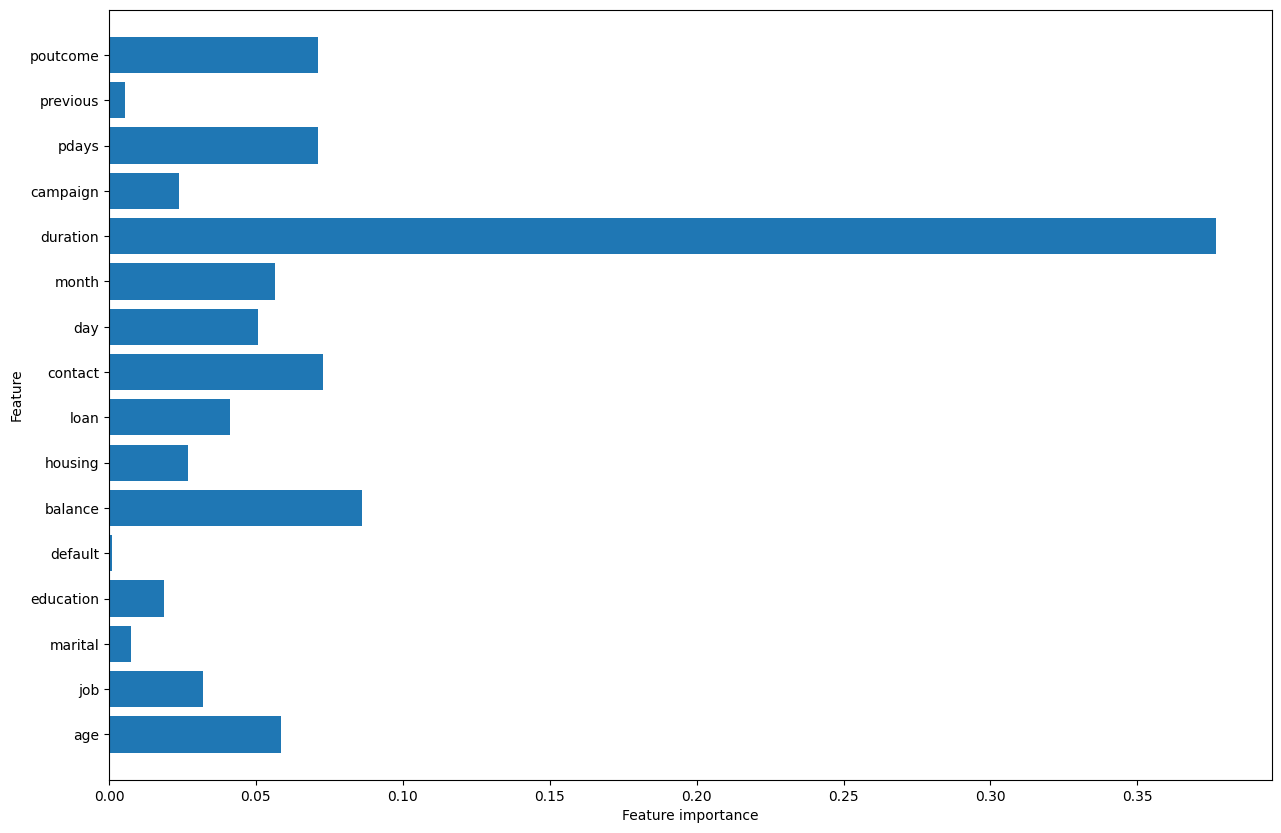

In [68]:
# visualize important features
def plot_feature_importances_attrition(model):
    plt.figure(figsize=(15,10))
    n_features = X_train.shape[1]  # Get the number of features from X_train
    plt.barh(range(n_features), model.feature_importances_, align='center')
    plt.yticks(np.arange(n_features), X_train.columns) # Use column names from X_train as labels
    plt.xlabel("Feature importance")
    plt.ylabel("Feature")
    plt.ylim(-1, n_features)

plot_feature_importances_attrition(tree)

In [69]:
# Show feature importances greater than 0.05
feature_importances = pd.Series(tree.feature_importances_, index=X_train.columns)
important_features = feature_importances[feature_importances > 0.05].sort_values(ascending=False)
important_features

,0
duration,0.376836
balance,0.085936
contact,0.072783
pdays,0.071296
poutcome,0.071055
age,0.058537
month,0.056543
day,0.050594


In [70]:
# using only important features for the prediction
important_features = ["duration", "balance", "contact",
    "pdays", "poutcome","age","month","day"]
X_importance = df_encoded[important_features] #input
y_importance = df_encoded['y'] #target

In [71]:
display(X_importance)
display(y_importance)

,duration,balance,contact,pdays,poutcome,age,month,day
0,79,1787,0.0,-1,3.0,30,10.0,19
1,220,4789,0.0,339,0.0,33,8.0,11
2,185,1350,0.0,330,0.0,35,0.0,16
3,199,1476,2.0,-1,3.0,30,6.0,3
4,226,0,2.0,-1,3.0,59,8.0,5
...,...,...,...,...,...,...,...,...
4516,329,-333,0.0,-1,3.0,33,5.0,30
4517,153,-3313,2.0,-1,3.0,57,8.0,9
4518,151,295,0.0,-1,3.0,57,1.0,19
4519,129,1137,0.0,211,1.0,28,3.0,6


,y
0,0
1,0
2,0
3,0
4,0
...,...
4516,0
4517,0
4518,0
4519,0


In [72]:
# oversampling againnn
categorical_features = ["contact", "poutcome","month"]

smotenc = SMOTENC(categorical_features=categorical_features, random_state=42)
X_importance, y_importance = smotenc.fit_resample(X_importance, y_importance)

X_train, X_test, y_train, y_test = train_test_split(X_importance, y_importance, test_size=0.3, random_state=0)

# check the shape of X_train and X_test
X_train.shape, X_test.shape

((5600, 8), (2400, 8))

In [73]:
X_train_importance, X_test_importance, y_train_importance, y_test_importance = train_test_split(X_importance, y_importance, test_size=0.3, random_state=42)

importance_tree = DecisionTreeClassifier(random_state=42)
importance_tree.fit(X_train_importance, y_train_importance)

y_pred_train_importance = importance_tree.predict(X_train_importance)
y_pred_test_importance = importance_tree.predict(X_test_importance)

print("\n=== Classification Report (Training Set) ===")
print(classification_report(y_train_importance, y_pred_train_importance))

print("\n=== Classification Report (Test Set) ===")
print(classification_report(y_test_importance, y_pred_test_importance))


=== Classification Report (Training Set) ===
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2794
           1       1.00      1.00      1.00      2806

    accuracy                           1.00      5600
   macro avg       1.00      1.00      1.00      5600
weighted avg       1.00      1.00      1.00      5600


=== Classification Report (Test Set) ===
              precision    recall  f1-score   support

           0       0.89      0.88      0.88      1206
           1       0.88      0.89      0.88      1194

    accuracy                           0.88      2400
   macro avg       0.88      0.88      0.88      2400
weighted avg       0.88      0.88      0.88      2400



## Decision Tree Summary:

All models achieve strong and stable performance with test F1-scores between 0.86-0.88.

| Model                        | Accuracy (Test) | F1-Score (Test) |
|-------------------------------|-----------------|------------------|
| SMOTENC                      | 0.87            | 0.87             |
| K-Fold Cross Validation       | ≈0.86           | 0.86             |
| Feature Importance | **0.88**        | **0.88**         |

**Feature Importance** gives the best final accuracy and F1-score (0.88), making it the most effective and interpretable model.*

# Random Forest

In [74]:
from sklearn.ensemble import RandomForestClassifier

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

model = RandomForestClassifier(n_estimators=100,
                               max_features="sqrt",
                               max_depth=6,
                               max_leaf_nodes=6)
model.fit(X_train,y_train)

RandomForestClassifier(max_depth=6, max_leaf_nodes=6)

In [75]:
y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)

print("\n=== Classification Report (Training Set) ===")
print(classification_report(y_train, y_pred_train))

print("\n=== Classification Report (Test Set) ===")
print(classification_report(y_test, y_pred_test))


=== Classification Report (Training Set) ===
              precision    recall  f1-score   support

           0       0.87      0.80      0.83      2808
           1       0.81      0.88      0.84      2792

    accuracy                           0.84      5600
   macro avg       0.84      0.84      0.84      5600
weighted avg       0.84      0.84      0.84      5600


=== Classification Report (Test Set) ===
              precision    recall  f1-score   support

           0       0.84      0.80      0.82      1192
           1       0.81      0.85      0.83      1208

    accuracy                           0.83      2400
   macro avg       0.83      0.83      0.83      2400
weighted avg       0.83      0.83      0.83      2400



In [76]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [2, 5],
    'bootstrap':[True, False]
}

grid_search = GridSearchCV(RandomForestClassifier(),param_grid=param_grid, cv=5)
grid_search.fit(X_train, y_train)

print("Best parameters: ", grid_search.best_params_)
print("Best cross-validation f1 score: {:.3f}".format(grid_search.best_score_))

Best parameters:  {'bootstrap': False, 'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 200}
Best cross-validation f1 score: 0.901


In [77]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

model = RandomForestClassifier(n_estimators=200,
                               max_features="sqrt",
                               max_depth=10,
                               min_samples_leaf=2,
                               min_samples_split=2,
                               bootstrap=False)
model.fit(X_train,y_train)
y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)

print("\n=== Classification Report (Training Set) ===")
print(classification_report(y_train, y_pred_train))

print("\n=== Classification Report (Test Set) ===")
print(classification_report(y_test, y_pred_test))


=== Classification Report (Training Set) ===
              precision    recall  f1-score   support

           0       0.97      0.93      0.95      2808
           1       0.94      0.97      0.95      2792

    accuracy                           0.95      5600
   macro avg       0.95      0.95      0.95      5600
weighted avg       0.95      0.95      0.95      5600


=== Classification Report (Test Set) ===
              precision    recall  f1-score   support

           0       0.92      0.88      0.90      1192
           1       0.89      0.92      0.90      1208

    accuracy                           0.90      2400
   macro avg       0.90      0.90      0.90      2400
weighted avg       0.90      0.90      0.90      2400



### Random Forest
Testing set
* Class 0 (No Attrition): precision = 0.92, recall = 0.88, F1 = 0.90
* Class 1 (Attrition): precision = 0.89, recall = 0.92, F1 = 0.90
Compared to the previous model (Decision Tree), this one achieves an F1-score of 0.90, which is slightly higher.

# Gradient Boosting Classifier

In [78]:
from sklearn.ensemble import GradientBoostingClassifier

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

gbs_clf = GradientBoostingClassifier(n_estimators=100,
                                     learning_rate=1.0,
                                     random_state=0,
                                     max_features=3)

gbs_clf.fit(X_train,y_train)

GradientBoostingClassifier(learning_rate=1.0, max_features=3, random_state=0)

In [79]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score

# Parameter grid untuk GridSearchCV
param_grid = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7],
}

gb_model = GradientBoostingClassifier()

grid_search = GridSearchCV(
    estimator=gb_model,
    param_grid=param_grid,
    cv=5,
    scoring='accuracy',
    n_jobs=-1
)

grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

y_pred_best = best_model.predict(X_test)

accuracy_best = accuracy_score(y_test, y_pred_best)

print("Best Parameters:", best_params)
print(f"Best Model Accuracy: {accuracy_best:.4f}")


Best Parameters: {'learning_rate': 0.2, 'max_depth': 7, 'n_estimators': 200}
Best Model Accuracy: 0.9300


In [80]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

model = GradientBoostingClassifier(learning_rate=0.2, max_depth=7, n_estimators=200)
model.fit(X_train,y_train)
y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)

print("\n=== Classification Report (Training Set) ===")
print(classification_report(y_train, y_pred_train))

print("\n=== Classification Report (Test Set) ===")
print(classification_report(y_test, y_pred_test))


=== Classification Report (Training Set) ===
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2808
           1       1.00      1.00      1.00      2792

    accuracy                           1.00      5600
   macro avg       1.00      1.00      1.00      5600
weighted avg       1.00      1.00      1.00      5600


=== Classification Report (Test Set) ===
              precision    recall  f1-score   support

           0       0.94      0.92      0.93      1192
           1       0.92      0.94      0.93      1208

    accuracy                           0.93      2400
   macro avg       0.93      0.93      0.93      2400
weighted avg       0.93      0.93      0.93      2400



### Gradient Boosting Classifier
Testing set
* Class 0 (No Attrition): precision = 0.94, recall = 0.92, F1 = 0.93
* Class 1 (Attrition): precision = 0.92, recall = 0.94, F1 = 0.93
Compared to the previous model (Decision Tree & Random Forest), this one achieves an F1-score of 0.93, which is higher 🎉.


=== Feature Importances ===
duration     0.392086
pdays        0.087011
balance      0.084689
contact      0.084212
poutcome     0.075777
month        0.058523
loan         0.041940
age          0.036086
housing      0.031007
day          0.026262
job          0.026254
campaign     0.023825
education    0.016070
marital      0.010028
previous     0.005462
default      0.000768
dtype: float64


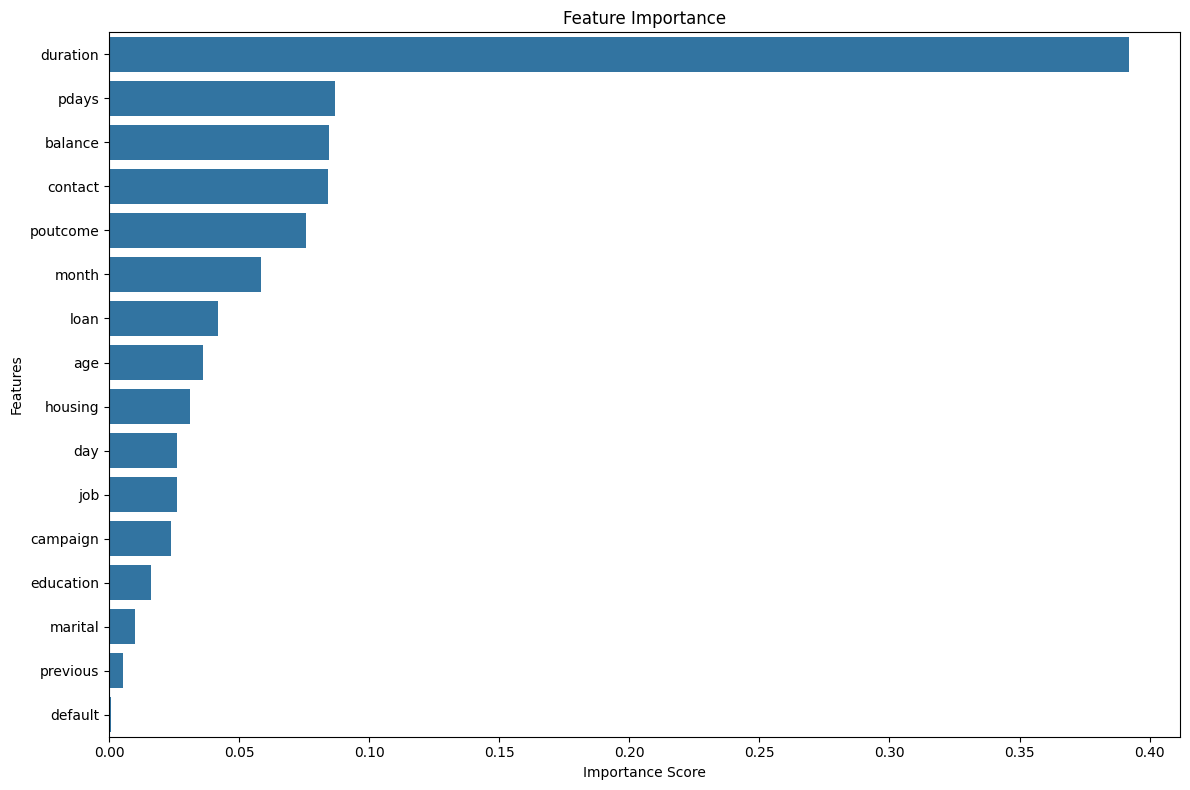

In [83]:
#Get the importance scores from the model
importances = model.feature_importances_
feature_names = X_train.columns
feature_importance_series = pd.Series(importances, index=feature_names)
feature_importance_series = feature_importance_series.sort_values(ascending=False)

print("\n=== Feature Importances ===")
print(feature_importance_series)

plt.figure(figsize=(12, 8))
sns.barplot(x=feature_importance_series, y=feature_importance_series.index)
plt.title('Feature Importance')
plt.xlabel('Importance Score')
plt.ylabel('Features')
plt.tight_layout()
plt.show()

# Model Evaluation



In [81]:
# Comparison data
data = {
    'Model': [
        'Decision Tree (Feature Importance)',
        'Random Forest',
        'Gradient Boosting Clasifier'
    ],
    'Accuracy (Test Set)': [0.88, 0.90, 0.93],
    'Precision (Test Set)': [0.88, 0.89, 0.92],
    'Recall (Test Set)': [0.89, 0.92, 0.94],
    'F1-Score (Test Set)': [0.88, 0.90, 0.93]
}

df_comparison = pd.DataFrame(data)

print("Comparison between models")
df_comparison

Comparison between models


,Model,Accuracy (Test Set),Precision (Test Set),Recall (Test Set),F1-Score (Test Set)
0,Decision Tree (Feature Importance),0.88,0.88,0.89,0.88
1,Random Forest,0.90,0.89,0.92,0.90
2,Gradient Boosting Clasifier,0.93,0.92,0.94,0.93


Part D – Discussion & Insights <br>
Answer the following:<br>
● Which model performed best overall?<br>
The model with the best performance is Gradient Boosting Classifier with a total Accuracy of 93%, Precision of 92%, Recall of 94% and F1 - Score of 93%
<br>
● Did ensemble methods (RF, XGBoost) improve performance compared to a single
Decision Tree?<br>
Yes by a lot, from the comparisan above, we can see that both random forest and xgboost did better than decision tree. With XGBoost being the best and random forest coming in second place for results.
<br>
● How could the bank use these insights to refine its marketing strategy?<br>
The bank can do a lot of things with these insights, such as<br>
1. Focus on the best customer to gain the most, by using xgboost the bank can see how likely a customer will say yes, so the bank can push more on those customers rather than waisting time on customers who are most unlikely to say yes.<br>
2. Target more spesific groups, from the charts/visualisations, we can see that 'management', 'blue-collar' and 'technician' are the groups who say yes the most. So targeting to these groups will most likely give the bank more customers.  
3. Why they say yes, we can also see that the most important thing that makes people say yes is the duration of the call so the bank should train their staff to keep customers engaged longer.